In [4]:
import librosa
import scipy
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
audio = 'data/nam/60_audio.wav'
ipd.Audio(audio)

In [12]:
signal, sr = librosa.load(audio)

In [21]:
def preprocess_vibration_audio(audio_array, sr=16000):
      # Spectral enhancement to emphasize formant structure
      audio_enhanced = librosa.effects.preemphasis(audio_array, coef=0.97)

      # Wiener filtering to reduce noise
      from scipy.signal import wiener
      audio_clean = wiener(audio_enhanced, noise=0.01)

      # Dynamic range compression for consistent levels
      audio_compressed = librosa.util.normalize(audio_clean)

      return audio_compressed

In [22]:
new_arr = preprocess_vibration_audio(signal, sr)
ipd.Audio(new_arr, rate=sr)

(171696,)

In [11]:
signal.shape

(171696,)

In [17]:
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
mfccs.shape

(13, 336)

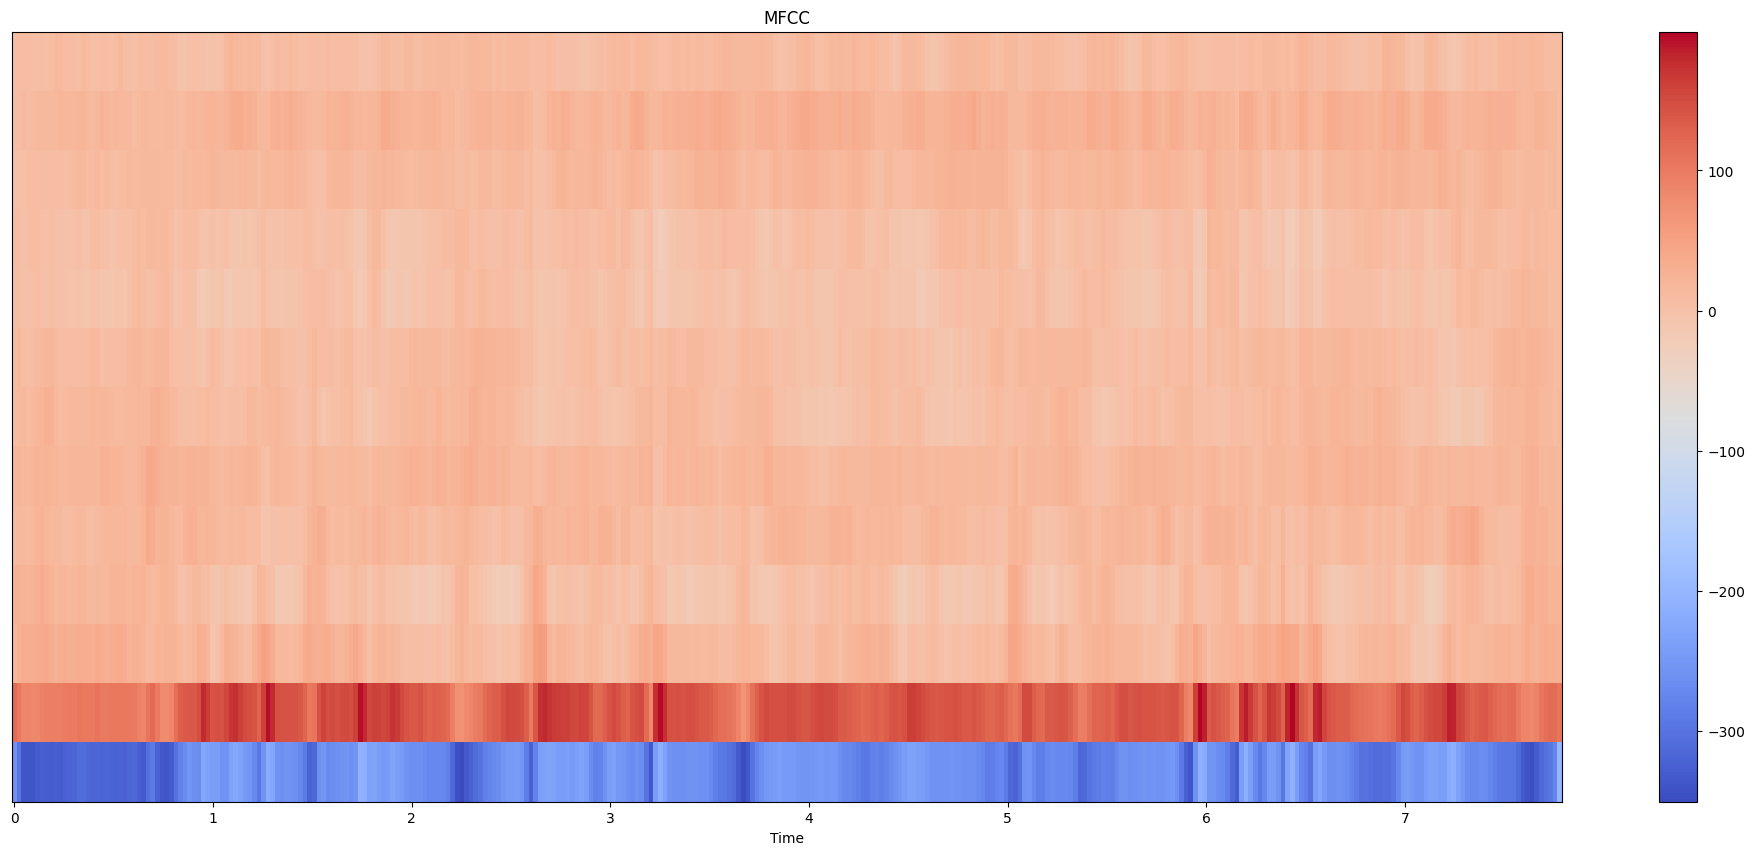

In [19]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.show()

In [21]:
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

delta_mfccs.shape

(13, 336)

In [22]:
delta2_mfccs.shape

(13, 336)

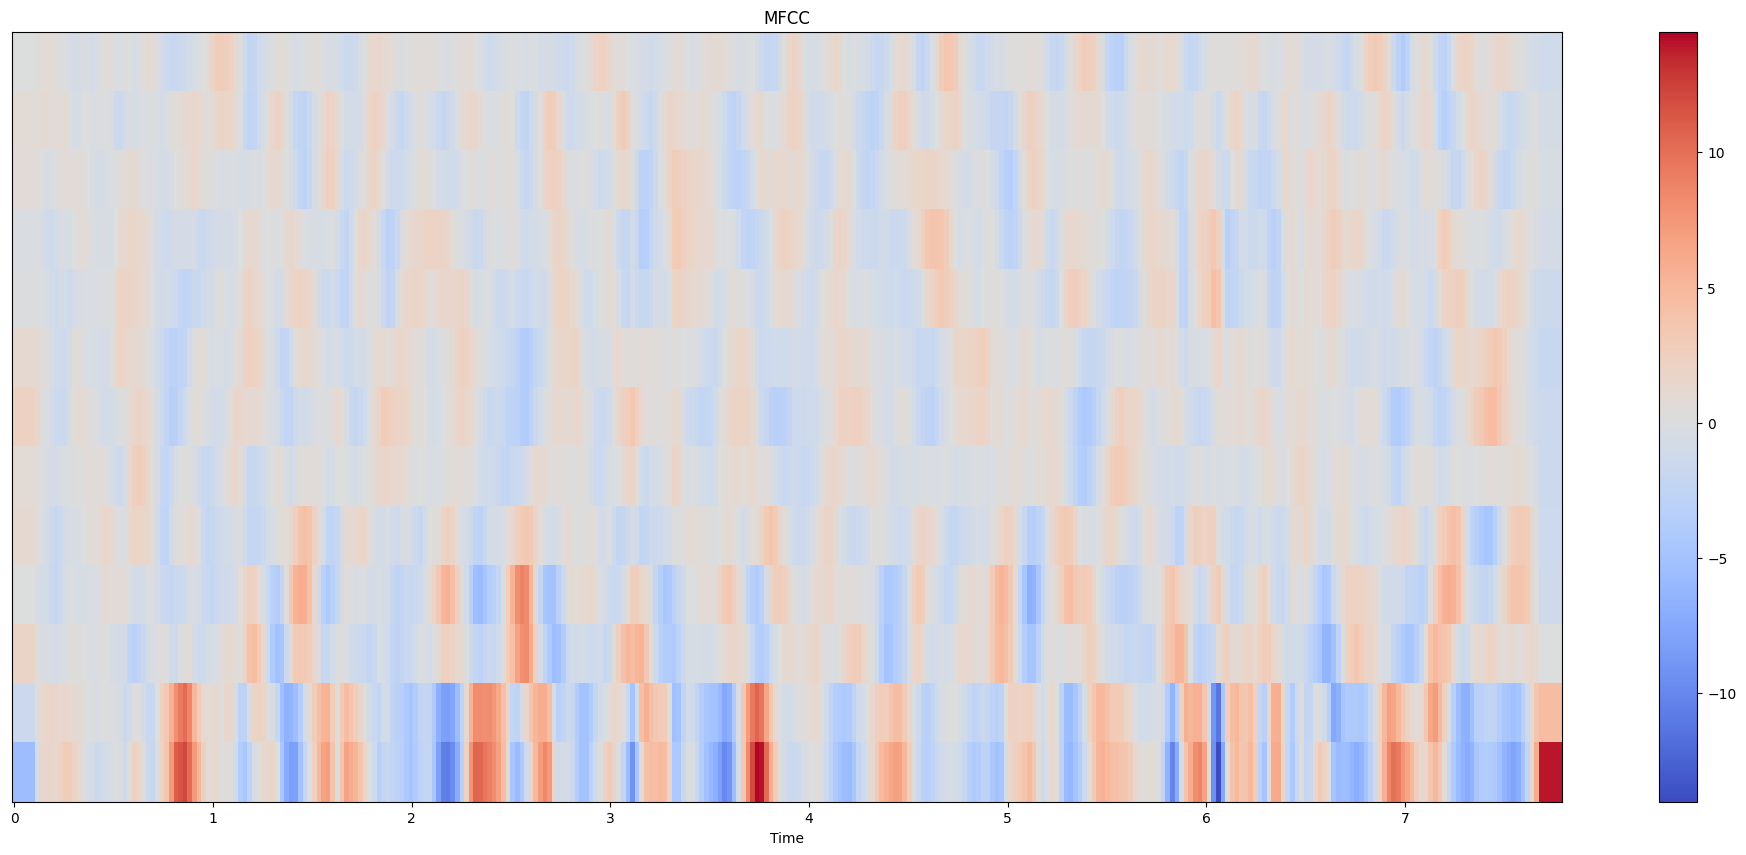

In [23]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.show()

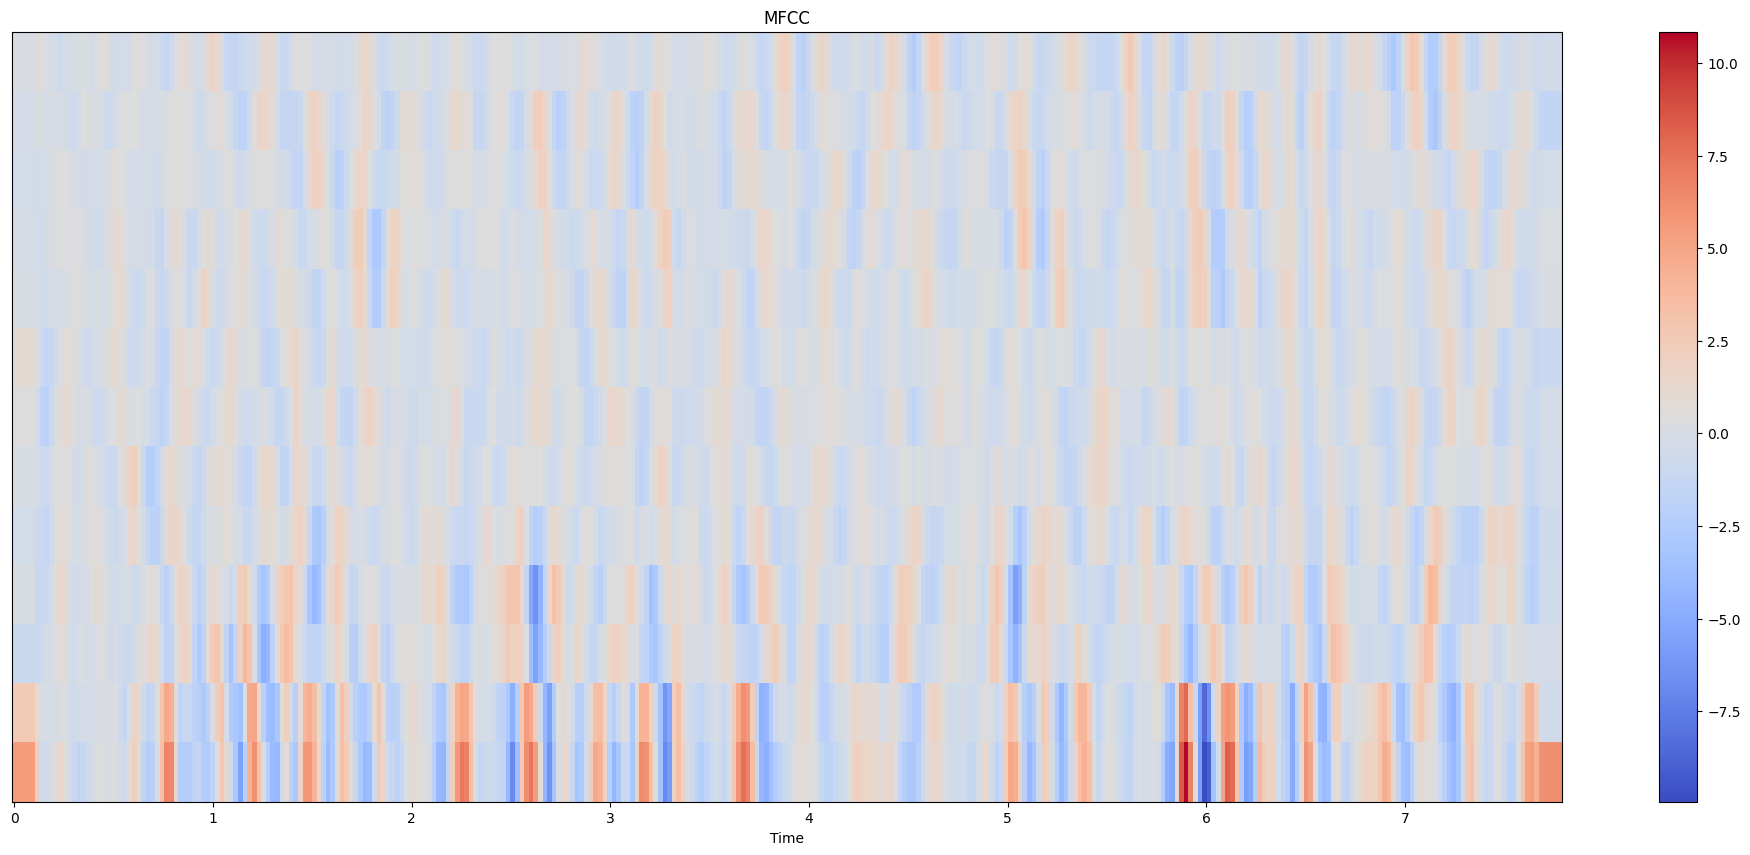

In [24]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.show()